# Importing libraries

In [13]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [14]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential # class of NN
from keras.layers import Convolution2D # class for adding convulution
from keras.layers import MaxPooling2D # pooling layer class
from keras.layers import Flatten # flatten layer class
from keras.layers import Dense, Dropout # other normal layers in NN
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from joblib import dump, load

In [15]:
os.listdir('datasets')

['test_set', 'training_set']

### Initialising the CNN

In [16]:
classifier = Sequential()

classifier.add(Convolution2D(filters = 16,
                            kernel_size = (5, 5),
                            input_shape = (512, 512, 1),
                            activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(.2))
classifier.add(Convolution2D(filters = 32,
                            kernel_size = (5, 5),
                            activation = 'relu'))

### Adding a second maxpooling layer

In [17]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(.2))

### Flattening

In [18]:
classifier.add(Flatten())

### Full connection

In [19]:
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

### Compiling the CNN

In [20]:
classifier.compile(optimizer = 'adam',
                    loss = 'binary_crossentropy',
                    metrics = ['accuracy'])

In [21]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 508, 508, 16)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 254, 254, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 254, 254, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 250, 250, 32)      12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 125, 125, 32)     0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 125, 125, 32)      0

In [22]:
def to_grayscale_then_rgb(image):
    # image = tf.image.rgb_to_grayscale(image)
    # image = tf.image.grayscale_to_rgb(image)
    return image

In [23]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                    preprocessing_function = to_grayscale_then_rgb)

test_datagen = ImageDataGenerator(rescale = 1/255, preprocessing_function = to_grayscale_then_rgb)

In [24]:
tr = train_datagen.flow_from_directory(
        'datasets/training_set',
        target_size = (512, 512),
        batch_size = 2,
        class_mode = 'binary',
        color_mode = 'grayscale')

tx = test_datagen.flow_from_directory(
        'datasets/test_set',
        target_size = (512, 512),
        batch_size = 2,
        class_mode = 'binary',
        color_mode = 'grayscale')

Found 200 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [25]:
tr.image_shape

(512, 512, 1)

In [26]:
tx.image_shape

(512, 512, 1)

In [27]:
history = classifier.fit(tr,
                        steps_per_epoch = 5,
                        epochs = 100,
                        validation_data = tx,
                        validation_steps = 20)

Epoch 1/100
5/5 [==============================] - 64s 11s/step - loss: 4.4132 - accuracy: 0.7000 - val_loss: 1.5901 - val_accuracy: 0.5000
Epoch 2/100
5/5 [==============================] - 71s 15s/step - loss: 10.6114 - accuracy: 0.4000 - val_loss: 0.8125 - val_accuracy: 0.5000
Epoch 3/100
5/5 [==============================] - 38s 8s/step - loss: 2.3939 - accuracy: 0.4000 - val_loss: 0.6926 - val_accuracy: 0.4750
Epoch 4/100
5/5 [==============================] - 34s 7s/step - loss: 0.6553 - accuracy: 0.7000 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 5/100
5/5 [==============================] - 38s 8s/step - loss: 0.6878 - accuracy: 0.6000 - val_loss: 0.6924 - val_accuracy: 0.5250
Epoch 6/100
5/5 [==============================] - 37s 8s/step - loss: 0.7528 - accuracy: 0.5000 - val_loss: 0.6905 - val_accuracy: 0.6000
Epoch 7/100
5/5 [==============================] - 34s 7s/step - loss: 0.6811 - accuracy: 0.6000 - val_loss: 0.6942 - val_accuracy: 0.4250
Epoch 8/100
5/5 [=======

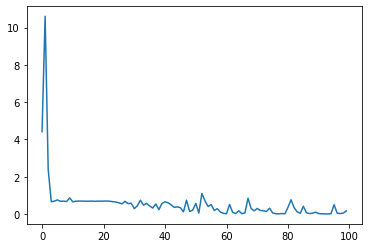

In [28]:
plt.plot(history.history['loss'])

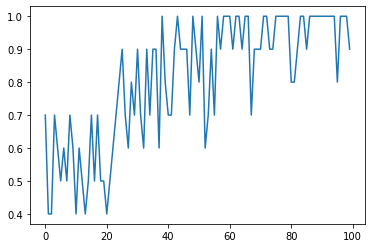

In [29]:
plt.plot(history.history['accuracy'])

In [30]:
classifier.evaluate(tx)

60/60 [==============================] - 40s 663ms/step - loss: 0.0509 - accuracy: 0.9917


[0.05090240761637688, 0.9916666746139526]

In [31]:
model_dict = {
    'title' : 'Handwritting Recognition Model',
    'classifier' : classifier
}

dump(model_dict,"hand_rec_ap.pkl")

INFO:tensorflow:Assets written to: ram://459e2289-91fc-477b-a585-87965692a4c7/assets


INFO:tensorflow:Assets written to: ram://459e2289-91fc-477b-a585-87965692a4c7/assets


['hand_rec_ap.pkl']

In [32]:
def load_model():
    filepath = 'hand_rec_ap.pkl'
    return load(filepath)

In [33]:
classifier.save('classifier.h5')

In [34]:
classifier = tf.keras.models.load_model('classifier.h5')

In [35]:
img = tf.keras.utils.load_img(f'D:\Projects\handwritting_recognition_using_cnn\datasets/test_set/Akash/01.jpg',color_mode='grayscale',target_size=(512,512,1))
xinp = tf.keras.utils.img_to_array(img)
np.array([xinp]).shape

(1, 512, 512, 1)

In [36]:
img = tf.keras.utils.load_img(f'D:\Projects\handwritting_recognition_using_cnn\datasets/test_set/Anmol/01.jpg',color_mode='grayscale',target_size=(512,512,1))
xinp = tf.keras.utils.img_to_array(img)
pred = classifier.predict(np.array([xinp]))[0]
print(pred)

1/1 [==============================] - 5s 5s/step
[1.]


In [37]:
if pred < .5:
    print('first person')
else:
    print('second person')

second person


In [38]:
classifier.predict(tx)

60/60 [==============================] - 48s 785ms/step


array([[1.9957526e-02],
       [9.9264020e-01],
       [7.5423056e-01],
       [9.7541225e-01],
       [2.5339847e-05],
       [2.0169076e-02],
       [9.9055982e-01],
       [9.4922423e-01],
       [9.9999982e-01],
       [7.1280668e-03],
       [9.9734360e-01],
       [9.9410206e-01],
       [5.1015900e-06],
       [4.8324317e-03],
       [8.3733170e-04],
       [9.5209807e-01],
       [9.9814886e-01],
       [8.2784212e-01],
       [9.7882291e-03],
       [9.9854481e-01],
       [1.2297444e-02],
       [6.5947711e-01],
       [8.4254635e-04],
       [1.2946161e-02],
       [2.8593434e-02],
       [9.9859852e-01],
       [1.5915051e-05],
       [9.6784222e-01],
       [9.9291044e-01],
       [9.9577194e-01],
       [5.8964016e-03],
       [9.9856448e-01],
       [7.5061794e-04],
       [1.8031409e-02],
       [9.0422016e-01],
       [4.3844618e-04],
       [9.9692178e-01],
       [9.7925174e-01],
       [4.4853605e-02],
       [8.5889557e-03],
       [3.8262684e-02],
       [9.963940

In [39]:
ans = []
for i in range(11,50):
    img = tf.keras.utils.load_img(f'D:\Projects\handwritting_recognition_using_cnn\datasets/training_set\Akash\{i}.jpg',color_mode='grayscale',target_size=(512,512,1))
    xinp = tf.keras.utils.img_to_array(img)
    pred = classifier.predict(np.array([xinp]))[0]
    print(pred)

    if pred < .5:
        print('first person')
        ans.append(0)
    else:
        print('second person')
        ans.append(1)

1/1 [==============================] - 1s 603ms/step
[0.]
first person
1/1 [==============================] - 0s 457ms/step
[0.]
first person
1/1 [==============================] - 1s 501ms/step
[0.]
first person
1/1 [==============================] - 0s 489ms/step
[0.]
first person
1/1 [==============================] - 1s 514ms/step
[0.]
first person
1/1 [==============================] - 1s 649ms/step
[0.]
first person
1/1 [==============================] - 1s 575ms/step
[0.]
first person
1/1 [==============================] - 1s 503ms/step
[0.]
first person
1/1 [==============================] - 1s 667ms/step
[0.]
first person
1/1 [==============================] - 1s 580ms/step
[0.]
first person
1/1 [==============================] - 0s 463ms/step
[0.]
first person
1/1 [==============================] - 0s 476ms/step
[0.]
first person
1/1 [==============================] - 1s 519ms/step
[0.]
first person
1/1 [==============================] - 1s 579ms/step
[0.]
first person
1/1 [=

In [40]:
print(ans)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [41]:
ans = []
for i in range(11,50):
    img = tf.keras.utils.load_img(f'D:\Projects\handwritting_recognition_using_cnn\datasets/training_set\Anmol\{i}.jpg',color_mode='grayscale',target_size=(512,512,1))
    xinp = tf.keras.utils.img_to_array(img)
    pred = classifier.predict(np.array([xinp]))[0]
    print(pred)

    if pred < .5:
        print('first person')
        ans.append(0)
    else:
        print('second person')
        ans.append(1)

1/1 [==============================] - 1s 600ms/step
[1.]
second person
1/1 [==============================] - 1s 949ms/step
[1.]
second person
1/1 [==============================] - 1s 1s/step
[1.]
second person
1/1 [==============================] - 1s 1s/step
[1.]
second person
1/1 [==============================] - 1s 1s/step
[1.]
second person
1/1 [==============================] - 1s 1s/step
[1.]
second person
1/1 [==============================] - 1s 567ms/step
[1.]
second person
1/1 [==============================] - 1s 629ms/step
[1.]
second person
1/1 [==============================] - 1s 879ms/step
[1.]
second person
1/1 [==============================] - 1s 982ms/step
[0.]
first person
1/1 [==============================] - 1s 904ms/step
[1.]
second person
1/1 [==============================] - 1s 1s/step
[1.]
second person
1/1 [==============================] - 4s 4s/step
[1.]
second person
1/1 [==============================] - 1s 899ms/step
[1.]
second person
1/1 [======

In [42]:
print(ans)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
